**MUHAMMAD FAHMI**


**FRESH GRADUATE ACADEMY**

**MACHINE LEARNING - IBM**

**NO. REGISTRASI : 0182180131-64**

**FINAL SUBMISSION 1 : IMAGE CLASSIFICATION**

# **IMPORT** **LIBRARY**


In [1]:
import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# **DATASET**

**> UNDUH DATASET DARI DICODING**

In [2]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip

--2021-07-01 13:47:14--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘rockpaperscissors.zip’

rockpaperscissors.z 100%[===================>] 307.92M  11.3MB/s    in 30s     

2021-07-01 13:47:44 (10.1 MB/s) - ‘rockpaperscissors.zip’ saved [322873683/322873683]



**> MENGEKSTRAK DATASET**

In [3]:
import os
import zipfile

local_zip = '/content/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/')
zip_ref.close()

**> MENYIAPKAN FILE DATASET (BATU,KERTAS,GUNTING)**

In [4]:
import os
fold_rock = os.path.join('/content/rockpaperscissors/rock')
fold_paper = os.path.join('/content/rockpaperscissors/paper')
fold_scissors = os.path.join('/content/rockpaperscissors/scissors')

print('Total gambar Batu:', len(os.listdir(fold_rock)))
print('Total gambar Kertas:', len(os.listdir(fold_paper)))
print('Total gambar Gunting:', len(os.listdir(fold_scissors)))

print("Tampilkan File Gambar:")
file_rock = os.listdir(fold_rock)
print("Rock :",file_rock[:5])

file_paper = os.listdir(fold_paper)
print("Paper :",file_paper[:5])

file_scissors = os.listdir(fold_scissors)
print("Scissors :",file_scissors[:5])

Total gambar Batu: 726
Total gambar Kertas: 712
Total gambar Gunting: 750
Tampilkan File Gambar:
Rock : ['JIdgNYR5ymqv8uxv.png', 'HHXLX66BbEVNYl6W.png', 'gtVEm7JEdr0wE1ip.png', '6bGxG6c9DxmZBcIB.png', 'VnSCn5IIg7m8d9Os.png']
Paper : ['JFOcfFSm3Ul0Xkha.png', 'oWI7JL85eXDhRFcV.png', 'prCirglnpqZ4KRmM.png', 'CnRjJejRPD3QmYTl.png', 'PwkqvoT0noMITNaF.png']
Scissors : ['HJ3qSJKzOvM3IwZR.png', 'hzvSpM4olIqXfeVt.png', 'SJCguzLeVcfuZ2OA.png', 'WUEe440w137BuSEE.png', '7gnNbHRprrV3r7kX.png']


**> MENAMPILKAN CONTOH GAMBAR DATA**

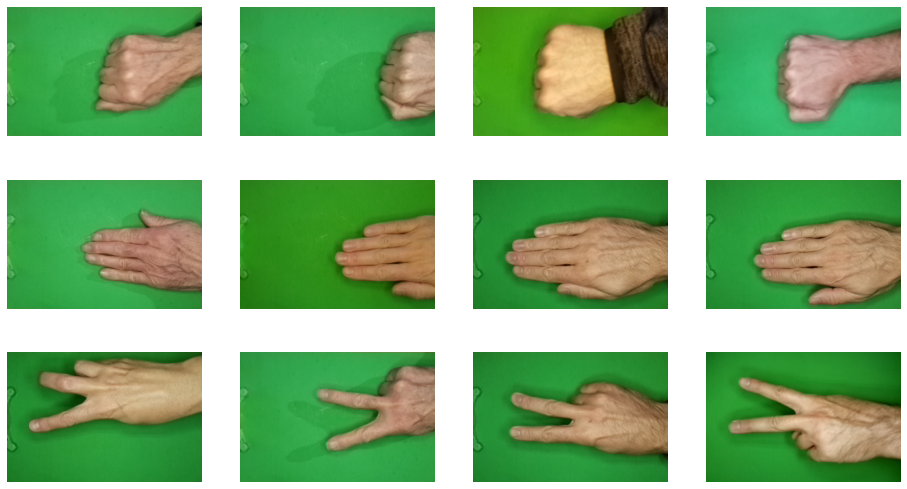

In [5]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 3
ncols = 4

pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 3)

pic_index += 4
img_show_rock = [os.path.join(fold_rock, fname)
                for fname in file_rock[pic_index-4:pic_index]]
img_show_paper = [os.path.join(fold_paper, fname)
                for fname in file_paper[pic_index-4:pic_index]]
img_show_scissors = [os.path.join(fold_scissors, fname)
                for fname in file_scissors[pic_index-4:pic_index]]

for i, img_path in enumerate(img_show_rock+img_show_paper+img_show_scissors):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**> MENGIMPORT MODUL YANG DIGUNAKANG**

In [6]:
import tensorflow as tf 
import keras_preprocessing

from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

**> AUGMENTASI DATA DAN PEMISAHAN DATA MENJADI DATA TRAINING DAN VALIDASI**

In [9]:
BASIS_DIR = "/content/rockpaperscissors/rps-cv-images/"
training_datagen = ImageDataGenerator(
      rescale = 1./200,
      rotation_range=30,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest',
      validation_split=0.4
      )

**> GENERATOR DATA**

In [8]:
train_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=True,
    subset='training'
    )

validation_generator = training_datagen.flow_from_directory(
    BASIS_DIR,
    target_size=(150, 150),
    class_mode='categorical',
    shuffle=True,
    subset='validation'
    )

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


# **MEMBUAT MODEL JARINGAN SARAF TIRUAN**

**> MODEL SEQUENTIAL**

In [10]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2, 2),

                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dropout(0.5),

                                    tf.keras.layers.Dense(128, activation='relu'),

                                    tf.keras.layers.Dense(512, activation='relu'),

                                    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()
Model: "sequential_2"

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
flatten (Flatten)            (None, 36992)             0

**> KOMPILASI MODEL**

In [11]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

**> PELATIHAN MODEL**

In [13]:
history=model.fit(
    train_generator,
    steps_per_epoch=4,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=4,
    verbose=2
)

Epoch 1/100
4/4 - 9s - loss: 1.0460 - accuracy: 0.3906 - val_loss: 0.9981 - val_accuracy: 0.6406
Epoch 2/100
4/4 - 8s - loss: 0.9785 - accuracy: 0.5781 - val_loss: 0.8658 - val_accuracy: 0.6562
Epoch 3/100
4/4 - 8s - loss: 1.9233 - accuracy: 0.3594 - val_loss: 1.0325 - val_accuracy: 0.6406
Epoch 4/100
4/4 - 7s - loss: 1.0432 - accuracy: 0.4898 - val_loss: 0.9833 - val_accuracy: 0.6328
Epoch 5/100
4/4 - 8s - loss: 0.9257 - accuracy: 0.6953 - val_loss: 0.8502 - val_accuracy: 0.6797
Epoch 6/100
4/4 - 8s - loss: 0.8823 - accuracy: 0.6406 - val_loss: 0.8570 - val_accuracy: 0.5859
Epoch 7/100
4/4 - 8s - loss: 0.9020 - accuracy: 0.5391 - val_loss: 1.1821 - val_accuracy: 0.3828
Epoch 8/100
4/4 - 8s - loss: 1.0611 - accuracy: 0.4844 - val_loss: 0.8984 - val_accuracy: 0.5781
Epoch 9/100
4/4 - 8s - loss: 0.7438 - accuracy: 0.7344 - val_loss: 0.8030 - val_accuracy: 0.6719
Epoch 10/100
4/4 - 8s - loss: 1.0474 - accuracy: 0.5547 - val_loss: 0.8693 - val_accuracy: 0.5938
Epoch 11/100
4/4 - 8s - loss:

**PLOTTING HASIL AKURASI DATA TRAINING DAN VALIDASI**

<function matplotlib.pyplot.show>

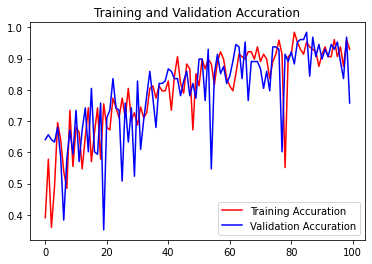

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training Accuration')
plt.plot(epochs, val_acc, 'b', label='Validation Accuration')
plt.title('Training and Validation Accuration')
plt.legend(loc=0)
plt.figure()
plt.show

# **UJI COBA MODEL**

Saving 3598435.png to 3598435.png
3598435.png
This Hand is Showing SCISSORS


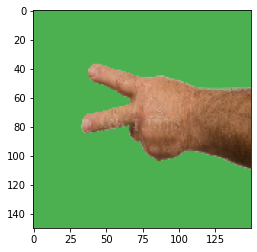

In [19]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0]==1:
    print('This Hand is Showing ROCK')
  elif classes[0][1]==1:
    print('This Hand is Showing PAPER')
  elif classes[0][2]==1:
    print('This Hand is Showing SCISSORS')
  else:
    print('UNKNOWN')